In [1]:
## use new fibo list can achieve 44.8 on LB

In [74]:
## Download Code
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

train = pd.read_csv("train_1.csv")
# train = train.fillna(0.)

In [149]:
sample = pd.read_csv("sample_submission_1.csv")

In [151]:
sample.shape

(8703780, 2)

In [3]:
test = pd.read_csv("key_1.csv")
test['date'] = test.Page.apply(lambda x: x[-10:])
test['date'] = test['date'].astype('datetime64[ns]')
# test['weekend'] = (test.date.dt.dayofweek // 5).astype(float)

test['Page'] = test.Page.apply(lambda x: x[:-11])

# test = test.merge(train[['Page','Visits']], on='Page', how='left')
# test[['Id','Visits']].to_csv('fibo2_sub.csv', index=False)

In [109]:
mytest = pd.DataFrame(pd.Series(test.Page.unique()), columns=["Page"])

In [111]:
mytest.join(train.set_index("Page"), on = "Page", how="left")

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,!vote_en.wikipedia.org_all-access_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0
1,!vote_en.wikipedia.org_all-access_spider,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,...,2.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
2,!vote_en.wikipedia.org_desktop_all-agents,3.0,4.0,7.0,4.0,4.0,2.0,3.0,7.0,2.0,...,3.0,1.0,6.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0
3,????:Andrey_Belloly_1.jpg_ru.wikipedia.org_all...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,????:Andrey_Belloly_1.jpg_ru.wikipedia.org_all...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,????:Andrey_Belloly_1.jpg_ru.wikipedia.org_des...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,¿Qué_culpa_tiene_Fatmagül?_es.wikipedia.org_al...,3808.0,3449.0,3895.0,2392.0,2599.0,4144.0,5760.0,4406.0,3972.0,...,372.0,501.0,306.0,225.0,393.0,467.0,569.0,497.0,473.0,329.0
7,¿Qué_culpa_tiene_Fatmagül?_es.wikipedia.org_al...,5.0,3.0,7.0,2.0,3.0,26.0,11.0,10.0,31.0,...,7.0,8.0,3.0,4.0,7.0,3.0,11.0,1.0,0.0,3.0
8,¿Qué_culpa_tiene_Fatmagül?_es.wikipedia.org_de...,1515.0,1507.0,1502.0,980.0,948.0,1634.0,2256.0,1744.0,1640.0,...,124.0,132.0,73.0,45.0,93.0,120.0,147.0,129.0,110.0,84.0
9,¿Qué_culpa_tiene_Fatmagül?_es.wikipedia.org_mo...,2277.0,1930.0,2379.0,1401.0,1644.0,2497.0,3481.0,2649.0,2317.0,...,247.0,369.0,231.0,177.0,296.0,345.0,421.0,367.0,361.0,239.0


In [125]:
mask.any()

False

In [134]:
mytest.shape

(145063, 1)

In [161]:
all_res = []
x = np.arange(49).reshape(-1, 1).astype(float)
Y = np.log1p(train.iloc[:, -49:].values.astype(float))

In [162]:
Y.shape

(145063, 49)

In [163]:
all_res = []
# for i in range(10000):
for i in range(mytest.shape[0]):
    if i % 10000 == 0:
        print i

    y = Y[i]

#     y = np.log1p(train.iloc[i, 1:].values.astype(float))
    mask = np.invert(np.isnan(y))
    if not mask.any():
        res = np.zeros(60)
    else:
        ridge.fit(x[mask], y[mask])
        res = ridge.predict(np.arange(Y.shape[1],Y.shape[1] + 60).reshape(-1,1))
    all_res.append(res)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000


In [164]:
sample.Visits = np.expm1(np.array(all_res).reshape(-1))

In [166]:
sample.Visits.max()

7.4174496438138209e+36

In [165]:
sample.head(100)

,Id,Visits
0,bf4edcf969af,26.208243
1,929ed2bf52b9,26.451802
2,ff29d0f51d5c,26.697541
3,e98873359be6,26.945480
4,fa012434263a,27.195639
5,48f1e93517a2,27.448037
6,5def418fcb36,27.702694
7,77bd08134351,27.959632
8,5889e6dbb16f,28.218869
9,5f21fef1d764,28.480426


In [ ]:
log(x+1) = t

In [ ]:
e^t-1

In [119]:
np.arange(550,610)

array([550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562,
       563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575,
       576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588,
       589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601,
       602, 603, 604, 605, 606, 607, 608, 609])

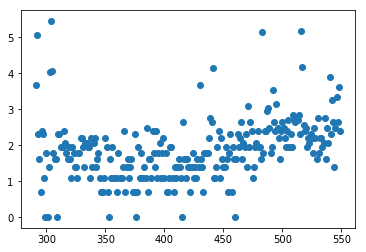

In [99]:
plt.scatter(x[mask], y[mask])

In [81]:
from sklearn.linear_model import Ridge

In [82]:
ridge = Ridge()

In [91]:
y == np.nan

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [84]:
x.shape, y.shape

((550, 1), (550,))

In [86]:
ridge.fit(x, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [56]:
cc = ridge.predict(np.arange(551,620).reshape(-1, 1).astype(float))

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

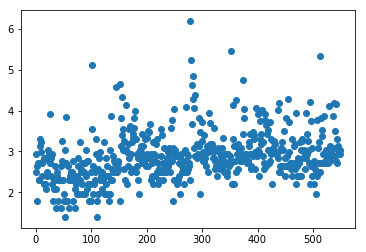

In [55]:
plt.scatter(x,y)

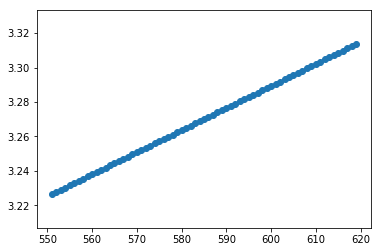

In [57]:
plt.scatter(np.arange(551,620).reshape(-1, 1), cc)

In [8]:
test.Page.unique().shape

(145063,)

In [ ]:
from datetime import datetime, timedelta

In [ ]:
timedelta(days=10)

In [ ]:
test.head()

In [6]:
test = test.merge(train[['Page','Visits']], on='Page', how='left')

In [7]:
test.head()

,Page,Id,date,weekend,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,1.0,3.0
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,0.0,3.0
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,0.0,3.0
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,0.0,3.0
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,0.0,3.0


In [8]:
test.shape

(8703780, 5)

In [9]:
weighted_res = pd.read_csv("res_backup/weight_0.9_median_45.1.csv")

In [10]:
weighted_res.shape

(8703780, 2)

In [11]:
test.head()

,Page,Id,date,weekend,Visits
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,1.0,3.0
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,0.0,3.0
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,0.0,3.0
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,0.0,3.0
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,0.0,3.0


In [12]:
test["other_res"] = weighted_res.Visits

In [13]:
test.head()

,Page,Id,date,weekend,Visits,other_res
0,!vote_en.wikipedia.org_all-access_all-agents,bf4edcf969af,2017-01-01,1.0,3.0,3.12
1,!vote_en.wikipedia.org_all-access_all-agents,929ed2bf52b9,2017-01-02,0.0,3.0,2.08
2,!vote_en.wikipedia.org_all-access_all-agents,ff29d0f51d5c,2017-01-03,0.0,3.0,2.08
3,!vote_en.wikipedia.org_all-access_all-agents,e98873359be6,2017-01-04,0.0,3.0,2.08
4,!vote_en.wikipedia.org_all-access_all-agents,fa012434263a,2017-01-05,0.0,3.0,2.08


In [14]:
test['Visits'] = (test.weekend == 1) * test.other_res * 0.9 + (test.weekend == 1) * test.Visits * 0.1 + (test.weekend == 0) * test.Visits

In [15]:
mytest = test[["Id", "Visits"]]

In [16]:
mytest.to_csv("fibo_and_weekend_weight_0.8_on_weekend.csv", index=False)

In [18]:
mytest = pd.read_csv("res_backup/fibo_and_weekend_weight_0.9_on_weekend_44.6.csv")

In [22]:
mytest.Visits = np.round(mytest.Visits)

In [23]:
mytest.head()

,Id,Visits
0,bf4edcf969af,3.0
1,929ed2bf52b9,3.0
2,ff29d0f51d5c,3.0
3,e98873359be6,3.0
4,fa012434263a,3.0


In [24]:
mytest.to_csv("fibo_and_weekend_weight_0.9_round.csv", index = False)

In [27]:
test.tail(200)

,Page,Id,date,weekend,Visits,other_res
8703580,龔嘉欣_zh.wikipedia.org_desktop_all-agents,308fe8a626a1,2017-02-10,0.0,298.0,463.692
8703581,龔嘉欣_zh.wikipedia.org_desktop_all-agents,16f9009c97a7,2017-02-11,1.0,298.0,349.911
8703582,龔嘉欣_zh.wikipedia.org_desktop_all-agents,86270ca7f536,2017-02-12,1.0,298.0,349.911
8703583,龔嘉欣_zh.wikipedia.org_desktop_all-agents,72c456ec7f45,2017-02-13,0.0,298.0,463.692
8703584,龔嘉欣_zh.wikipedia.org_desktop_all-agents,167f3b276b68,2017-02-14,0.0,298.0,463.692
8703585,龔嘉欣_zh.wikipedia.org_desktop_all-agents,55f60da44fe6,2017-02-15,0.0,298.0,463.692
8703586,龔嘉欣_zh.wikipedia.org_desktop_all-agents,b8bb5e415118,2017-02-16,0.0,298.0,463.692
8703587,龔嘉欣_zh.wikipedia.org_desktop_all-agents,ff8251c57216,2017-02-17,0.0,298.0,463.692
8703588,龔嘉欣_zh.wikipedia.org_desktop_all-agents,51c0d34438c4,2017-02-18,1.0,298.0,349.911
8703589,龔嘉欣_zh.wikipedia.org_desktop_all-agents,814b27710d93,2017-02-19,1.0,298.0,349.911


In [ ]:
def get_features(df):
    df['date'] = df['date'].astype('datetime64[ns]')
#     df['every2_weekdays'] = df.date.dt.dayofweek
    df['weekend'] = (df.date.dt.dayofweek // 5).astype(float)
    #df['shortweek'] = ((df.date.dt.dayofweek) // 4 == 1).astype(float)
    return df

In [21]:
test.date.dt.dayofweek // 5

0          1
1          0
2          0
3          0
4          0
5          0
6          1
7          1
8          0
9          0
10         0
11         0
12         0
13         1
14         1
15         0
16         0
17         0
18         0
19         0
20         1
21         1
22         0
23         0
24         0
25         0
26         0
27         1
28         1
29         0
          ..
8703750    0
8703751    0
8703752    0
8703753    0
8703754    1
8703755    1
8703756    0
8703757    0
8703758    0
8703759    0
8703760    0
8703761    1
8703762    1
8703763    0
8703764    0
8703765    0
8703766    0
8703767    0
8703768    1
8703769    1
8703770    0
8703771    0
8703772    0
8703773    0
8703774    0
8703775    1
8703776    1
8703777    0
8703778    0
8703779    0
Name: date, Length: 8703780, dtype: int64

In [5]:
## example here to show how many nonzero values in each line
for i, row in train.iterrows():
    M = []
    start = row[1:].nonzero()[0]
    print len(start),
    
    if i == 100:
        break

551 551 530 551 253 551 186 551 551 551 488 550 533 339 551 551 551 550 551 198 551 551 551 551 187 551 551 477 551 551 550 533 550 551 551 549 539 314 285 545 551 551 549 545 551 548 549 551 212 548 550 551 177 216 125 72 162 551 547 550 267 551 548 551 464 551 197 551 100 539 153 551 543 250 551 551 551 550 500 546 471 30 301 365 551 551 551 551 551 242 551 256 527 545 448 412 361 388 551 102 550


In [4]:
## holiday analysis

In [5]:
import pandas as pd
import numpy as np
import re
import gc; gc.enable()
from sklearn.feature_extraction import text
from sklearn import naive_bayes

train = pd.read_csv("train_1.csv")
#determine idiom with URL
train['origine']=train['Page'].apply(lambda x:re.split(".wikipedia.org", x)[0][-2:])
'''
This is what you get with a value counts on train.origine
en    24108
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
ts    13556
er     4299
'''
#we have english, japanese, deutch, french, chinese (taiwanese ?), russian, spanish
#ts and er are undetermined; in the next lines, I try to replace them by learning from special chars
#Note : this step wasn't tuned, and can't be perfect because other idioms are available in those Pages (such as portuguese for example)

#let's make a train, target, and test to predict language on ts and er pages
orig_train=train.loc[~train.origine.isin(['ts', 'er']), 'Page']
orig_target=train.loc[~train.origine.isin(['ts', 'er']), 'origine']
orig_test=train.loc[train.origine.isin(['ts', 'er']), 'Page']
#keep only interesting chars
orig_train2=orig_train.apply(lambda x:x.split(".wikipedia")[0][:-3]).apply(lambda x:re.sub("[a-zA-Z0-9():\-_ \'\.\/]", "", x))
orig_test2=orig_test.apply(lambda x:x.split(".wikipedia")[0][:-3]).apply(lambda x:re.sub("[a-zA-Z0-9():\-_ \'\.\/]", "", x))
#run TFIDF on those specific chars
tfidf=text.TfidfVectorizer(input='content', encoding='utf-8', decode_error='strict', strip_accents=None, 
                     lowercase=True, preprocessor=None, tokenizer=None, 
                     analyzer='char', #stop_words=[chr(x) for x in range(97,123)]+[chr(x) for x in range(65,91)]+['_','.',':'], 
                     token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=True, norm='l2', 
                     use_idf=True, smooth_idf=True, sublinear_tf=False)
orig_train2=tfidf.fit_transform(orig_train2)
#apply a simple naive bayes on the text features
model=naive_bayes.BernoulliNB()
model.fit(orig_train2, orig_target)
result=model.predict(tfidf.transform(orig_test2))
result=pd.DataFrame(result, index=orig_test)
result.columns=['origine']
#result will be used later to replace 'ts' and 'er' values
#we need to remove train.origine so that the train can be flattened with melt
del train['origine']

#let's flatten the train as did clustifier and initialize a "ferie" columns instead of a weekend column
train = pd.melt(train[list(train.columns[-49:])+['Page']], id_vars='Page', var_name='date', value_name='Visits')
train['date'] = train['date'].astype('datetime64[ns]')
train['ferie'] = ((train.date.dt.dayofweek) >=5).astype(float)
train['origine']=train['Page'].apply(lambda x:re.split(".wikipedia.org", x)[0][-2:])

#let's join with result to replace 'ts' and 'er'
join=train.loc[train.origine.isin(["ts","er"]), ['Page']]
join['origine']=0 #init
join.index=join["Page"]
join.origine=result
train.loc[train.origine.isin(["ts","er"]), ['origine']]=join.origine.values #replace

#official non working days by country (manual search with google)
#I made a lot of shortcuts considering that only Us and Uk used english idiom, 
#only Spain for spanich, only France for french, etc
train_us=['2015-07-04','2015-11-26','2015-12-25']+\
['2016-07-04','2016-11-24','2016-12-26']
test_us=[]
train_uk=['2015-12-25','2015-12-28'] +\
['2016-01-01','2016-03-28','2016-05-02','2016-05-30','2016-12-26','2016-12-27']
test_uk=['2017-01-01']
train_de=['2015-10-03', '2015-12-25', '2015-12-26']+\
['2016-01-01', '2016-03-25', '2016-03-26', '2016-03-27', '2016-01-01', '2016-05-05', '2016-05-15', '2016-05-16', '2016-10-03', '2016-12-25', '2016-12-26']
test_de=['2017-01-01']
train_fr=['2015-07-14', '2015-08-15', '2015-11-01', '2015-11-11', '2015-12-25']+\
['2016-01-01','2016-03-28', '2016-05-01', '2016-05-05', '2016-05-08', '2016-05-16', '2016-07-14', '2016-08-15', '2016-11-01','2016-11-11', '2016-12-25']
test_fr=['2017-01-01']
train_ru=['2015-11-04']+\
['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07', '2016-02-23', '2016-03-08', '2016-05-01', '2016-05-09', '2016-06-12', '2016-11-04']
test_ru=['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07', '2017-02-23']
train_es=['2015-08-15', '2015-10-12', '2015-11-01', '2015-12-06', '2015-12-08', '2015-12-25']+\
['2016-01-01', '2016-01-06', '2016-03-25', '2016-05-01', '2016-08-15', '2016-10-12', '2016-11-01', '2016-12-06', '2016-12-08', '2016-12-25']
test_es=['2017-01-01', '2017-01-06']
train_ja=['2015-07-20','2015-09-21', '2015-10-12', '2015-11-03', '2015-11-23', '2015-12-23']+\
['2016-01-01', '2016-01-11', '2016-02-11', '2016-03-20', '2016-04-29', '2016-05-03', '2016-05-04', '2016-05-05', '2016-07-18', '2016-08-11', '2016-09-22', '2016-10-10', '2016-11-03', '2016-11-23', '2016-12-23']
test_ja=['2017-01-01', '2017-01-09', '2017-02-11']
train_zh=['2015-09-27', '2015-10-01', '2015-10-02','2015-10-03','2015-10-04','2015-10-05','2015-10-06','2015-10-07']+\
['2016-01-01', '2016-01-02', '2016-01-03', '2016-02-08', '2016-02-09', '2016-02-10', '2016-02-11', '2016-02-12', '2016-04-04', '2016-05-01', '2016-05-02', '2016-06-09', '2016-06-10', '2016-09-15', '2016-09-16', '2016-10-03', '2016-10-04','2016-10-05','2016-10-06','2016-10-07']
test_zh=['2017-01-02', '2017-02-27', '2017-02-28', '2017-03-01']
#in China some saturday and sundays are worked
train_o_zh=['2015-10-10','2016-02-06', '2016-02-14', '2016-06-12', '2016-09-18', '2016-10-08', '2016-10-09']
test_o_zh=['2017-01-22', '2017-02-04']

#let's replace values in 'ferie' columns
train.loc[(train.origine=='en')&(train.date.isin(train_us+train_uk)), 'ferie']=1
train.loc[(train.origine=='de')&(train.date.isin(train_de)), 'ferie']=1
train.loc[(train.origine=='fr')&(train.date.isin(train_fr)), 'ferie']=1
train.loc[(train.origine=='ru')&(train.date.isin(train_ru)), 'ferie']=1
train.loc[(train.origine=='es')&(train.date.isin(train_es)), 'ferie']=1
train.loc[(train.origine=='ja')&(train.date.isin(train_ja)), 'ferie']=1
train.loc[(train.origine=='zh')&(train.date.isin(train_zh)), 'ferie']=1
train.loc[(train.origine=='zh')&(train.date.isin(train_o_zh)), 'ferie']=0

#same with test
test = pd.read_csv("key_1.csv")
test['date'] = test.Page.apply(lambda a: a[-10:])
test['Page'] = test.Page.apply(lambda a: a[:-11])
test['date'] = test['date'].astype('datetime64[ns]')
test['ferie'] = ((test.date.dt.dayofweek) >=5).astype(float)
test['origine']=test['Page'].apply(lambda x:re.split(".wikipedia.org", x)[0][-2:])

#joint with result
join=test.loc[test.origine.isin(["ts","er"]), ['Page']]
join['origine']=0
join.index=join["Page"]
join.origine=result
test.loc[test.origine.isin(["ts","er"]), ['origine']]=join.origine.values

test.loc[(test.origine=='en')&(test.date.isin(test_us+test_uk)), 'ferie']=1
test.loc[(test.origine=='de')&(test.date.isin(test_de)), 'ferie']=1
test.loc[(test.origine=='fr')&(test.date.isin(test_fr)), 'ferie']=1
test.loc[(test.origine=='ru')&(test.date.isin(test_ru)), 'ferie']=1
test.loc[(test.origine=='es')&(test.date.isin(test_es)), 'ferie']=1
test.loc[(test.origine=='ja')&(test.date.isin(test_ja)), 'ferie']=1
test.loc[(test.origine=='zh')&(test.date.isin(test_zh)), 'ferie']=1
test.loc[(test.origine=='zh')&(test.date.isin(test_o_zh)), 'ferie']=0

train_page_per_dow = train.groupby(['Page','ferie']).median().reset_index()
test = test.merge(train_page_per_dow, how='left')


In [31]:
test.loc[test.Visits.isnull(), 'Visits'] = 0

In [37]:
fibo_res = pd.read_csv('res_backup/fibo_newlist_44.8.csv')

In [38]:
weighted_res = pd.read_csv("res_backup/weight_0.9_median_45.1.csv")

In [39]:
fibo_res.Visits = np.round(test.Visits * 0.6 + weighted_res.Visits * 0.1 + fibo_res.Visits * 0.3)

In [40]:
fibo_res.to_csv("fibo_holiday_weekend_2.csv", index=False)

In [34]:
test.Visits[:200]

0      3.0
1      2.0
2      2.0
3      2.0
4      2.0
5      2.0
6      3.0
7      3.0
8      2.0
9      2.0
10     2.0
11     2.0
12     2.0
13     3.0
14     3.0
15     2.0
16     2.0
17     2.0
18     2.0
19     2.0
20     3.0
21     3.0
22     2.0
23     2.0
24     2.0
25     2.0
26     2.0
27     3.0
28     3.0
29     2.0
      ... 
170    2.0
171    2.0
172    2.0
173    2.0
174    2.0
175    3.0
176    3.0
177    2.0
178    2.0
179    2.0
180    0.0
181    0.0
182    0.0
183    0.0
184    0.0
185    0.0
186    0.0
187    0.0
188    0.0
189    0.0
190    0.0
191    0.0
192    0.0
193    0.0
194    0.0
195    0.0
196    0.0
197    0.0
198    0.0
199    0.0
Name: Visits, Length: 200, dtype: float64